In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
num_times = 400
times = np.arange(num_times)
data = np.arange(10, 10+num_times)**2
series0 = pd.Series(data, index=times)
series0[:10]

0    100
1    121
2    144
3    169
4    196
5    225
6    256
7    289
8    324
9    361
dtype: int64

In [73]:
data = data * (data%2 - 0.5)*2
series1 = pd.Series(data, index=times)
series1[:10]

0   -100.0
1    121.0
2   -144.0
3    169.0
4   -196.0
5    225.0
6   -256.0
7    289.0
8   -324.0
9    361.0
dtype: float64

In [74]:
series0.index = pd.to_datetime(series0.index, unit="s")   # s means seconds
series1.index = pd.to_datetime(series1.index, unit="s")   # s means seconds
series1[:10]

1970-01-01 00:00:00   -100.0
1970-01-01 00:00:01    121.0
1970-01-01 00:00:02   -144.0
1970-01-01 00:00:03    169.0
1970-01-01 00:00:04   -196.0
1970-01-01 00:00:05    225.0
1970-01-01 00:00:06   -256.0
1970-01-01 00:00:07    289.0
1970-01-01 00:00:08   -324.0
1970-01-01 00:00:09    361.0
dtype: float64

In [75]:
series1.index[:10]

DatetimeIndex(['1970-01-01 00:00:00', '1970-01-01 00:00:01',
               '1970-01-01 00:00:02', '1970-01-01 00:00:03',
               '1970-01-01 00:00:04', '1970-01-01 00:00:05',
               '1970-01-01 00:00:06', '1970-01-01 00:00:07',
               '1970-01-01 00:00:08', '1970-01-01 00:00:09'],
              dtype='datetime64[ns]', freq=None)

In [76]:
series0.autocorr(2)

0.9999975611772964

In [81]:
series0.autocorr(200)

0.9890193618133056

In [55]:
series1.autocorr(2)

0.9996825279006146

In [56]:
series1.autocorr()   # default is 1

-0.9999209153495595

In [57]:
series1.shift(7)

1970-01-01 00:00:00       NaN
1970-01-01 00:00:01       NaN
1970-01-01 00:00:02       NaN
1970-01-01 00:00:03       NaN
1970-01-01 00:00:04       NaN
1970-01-01 00:00:05       NaN
1970-01-01 00:00:06       NaN
1970-01-01 00:00:07    -100.0
1970-01-01 00:00:08     121.0
1970-01-01 00:00:09    -144.0
1970-01-01 00:00:10     169.0
1970-01-01 00:00:11    -196.0
1970-01-01 00:00:12     225.0
1970-01-01 00:00:13    -256.0
1970-01-01 00:00:14     289.0
1970-01-01 00:00:15    -324.0
1970-01-01 00:00:16     361.0
1970-01-01 00:00:17    -400.0
1970-01-01 00:00:18     441.0
1970-01-01 00:00:19    -484.0
1970-01-01 00:00:20     529.0
1970-01-01 00:00:21    -576.0
1970-01-01 00:00:22     625.0
1970-01-01 00:00:23    -676.0
1970-01-01 00:00:24     729.0
1970-01-01 00:00:25    -784.0
1970-01-01 00:00:26     841.0
1970-01-01 00:00:27    -900.0
1970-01-01 00:00:28     961.0
1970-01-01 00:00:29   -1024.0
1970-01-01 00:00:30    1089.0
1970-01-01 00:00:31   -1156.0
1970-01-01 00:00:32    1225.0
1970-01-01

In [58]:
series1.corr(series1.shift(7))

-0.9961030711935859

<BarContainer object of 400 artists>

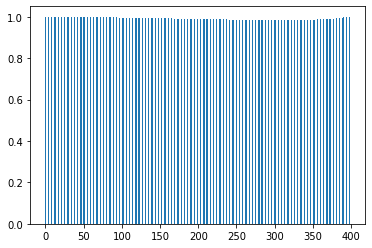

In [102]:
lags = range(400)
corrs = np.array([series0.autocorr(n) for n in lags])
plt.bar(lags, corrs, width=0.4)

<BarContainer object of 400 artists>

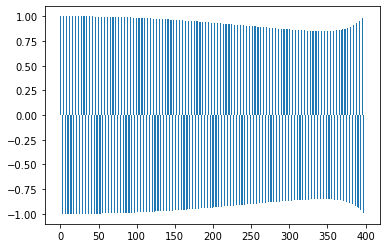

In [103]:
lags = range(400)
corrs = np.array([series1.autocorr(n) for n in lags])
plt.bar(lags, corrs)
                 

In [104]:
corrs

array([ 1.        , -0.99999875,  0.99999501, -0.99998874,  0.99997993,
       -0.99996857,  0.99995464, -0.99993811,  0.99991897, -0.9998972 ,
        0.99987278, -0.9998457 ,  0.99981594, -0.99978348,  0.9997483 ,
       -0.99971038,  0.99966971, -0.99962626,  0.99958003, -0.99953098,
        0.99947912, -0.9994244 ,  0.99936683, -0.99930638,  0.99924303,
       -0.99917677,  0.99910758, -0.99903544,  0.99896034, -0.99888225,
        0.99880117, -0.99871706,  0.99862994, -0.99853975,  0.99844651,
       -0.99835017,  0.99825075, -0.99814819,  0.99804253, -0.9979337 ,
        0.99782173, -0.99770655,  0.99758821, -0.99746663,  0.99734186,
       -0.99721382,  0.99708255, -0.99694799,  0.99681017, -0.99666902,
        0.99652461, -0.99637681,  0.99622573, -0.99607124,  0.99591345,
       -0.99575221,  0.99558765, -0.9954196 ,  0.99524822, -0.99507333,
        0.99489507, -0.99471327,  0.9945281 , -0.99433935,  0.99414722,
       -0.99395147,  0.99375233, -0.99354955,  0.99334335, -0.99

In [99]:
series1.shift(49)

1970-01-01 00:00:00         NaN
1970-01-01 00:00:01         NaN
1970-01-01 00:00:02         NaN
1970-01-01 00:00:03         NaN
1970-01-01 00:00:04         NaN
1970-01-01 00:00:05         NaN
1970-01-01 00:00:06         NaN
1970-01-01 00:00:07         NaN
1970-01-01 00:00:08         NaN
1970-01-01 00:00:09         NaN
1970-01-01 00:00:10         NaN
1970-01-01 00:00:11         NaN
1970-01-01 00:00:12         NaN
1970-01-01 00:00:13         NaN
1970-01-01 00:00:14         NaN
1970-01-01 00:00:15         NaN
1970-01-01 00:00:16         NaN
1970-01-01 00:00:17         NaN
1970-01-01 00:00:18         NaN
1970-01-01 00:00:19         NaN
1970-01-01 00:00:20         NaN
1970-01-01 00:00:21         NaN
1970-01-01 00:00:22         NaN
1970-01-01 00:00:23         NaN
1970-01-01 00:00:24         NaN
1970-01-01 00:00:25         NaN
1970-01-01 00:00:26         NaN
1970-01-01 00:00:27         NaN
1970-01-01 00:00:28         NaN
1970-01-01 00:00:29         NaN
                         ...   
1970-01-

In [69]:
series1.autocorr(-10)

0.9922287323794656

In [70]:
series1.autocorr(10)

0.9922287323794656